In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('seaborn')

You are free to choose the dataset within the following constraints :
* utf-8 encoded in a `data.csv` file
* several hundreds of lines
* at least 6 attributes (columns), the first being a unique id, separated by commas
* you may use some categorical (non quantitative) features.
* some fields should be correlated

If necessary, you can tweak a dataset in order to artificially make it possible to
apply analysis ans visualization techniques.

In [4]:
df = pd.read_csv("./data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The file analysis.py presents a quick analysis of the dataset. For instance :
* Histograms of quantitative variables with a comment on important statistical aspects, such as means , standard deviations , etc.
* A study of potential outliers
* Correlation matrices (maybe not for all variables)
* Any interesting analysis : if you have categorical data, with categories are represented most ? To what extent ?

In [5]:
# verify that there is no missing value in data
np.isnan(df.values).any()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# plot distribution of each column

fig = plt.figure(figsize=(8,12))
ax = fig.subplots(4, 2)
fig.tight_layout(h_pad=2)

for (i,col) in enumerate(df.columns[1:-1]):
    x = i % 4
    y = i // 4
    ax[x, y].set_title(col)
    ax[x, y].hist(df[col])
    
plt.subplots_adjust(top=0.85)
plt.show()

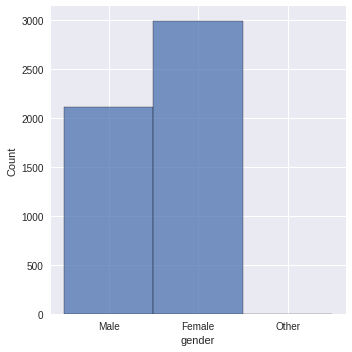

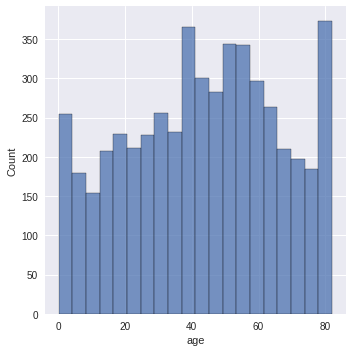

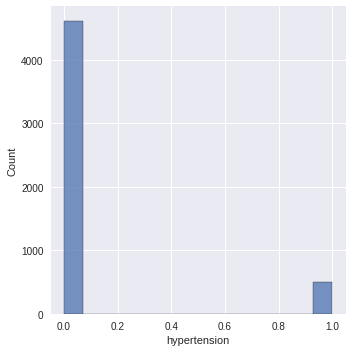

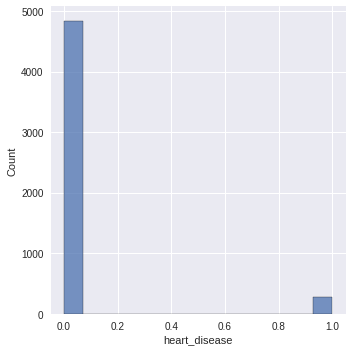

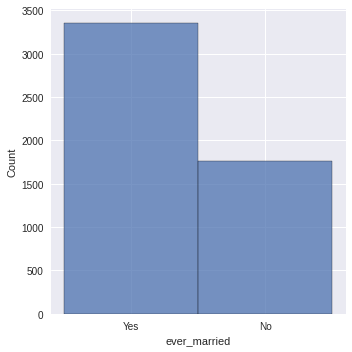

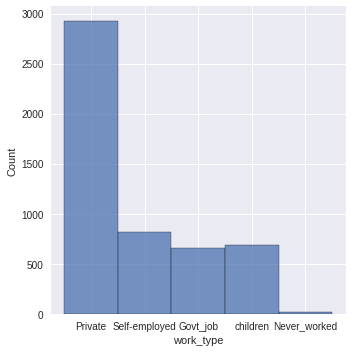

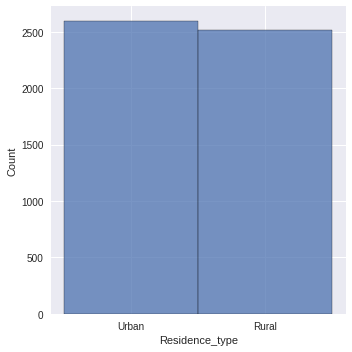

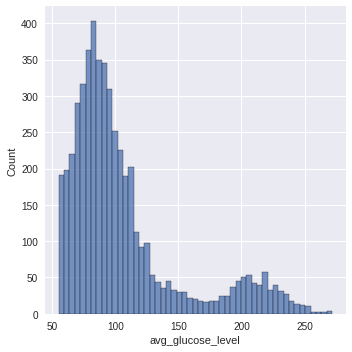

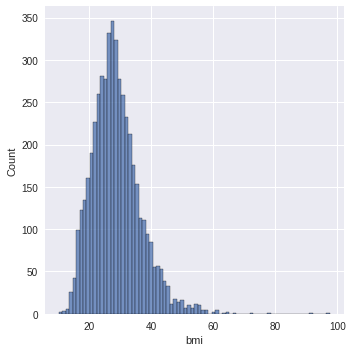

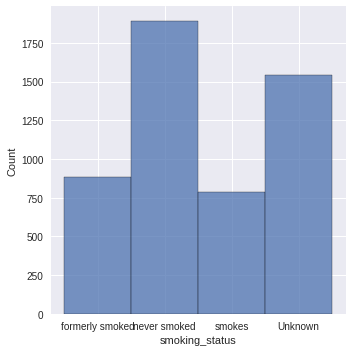

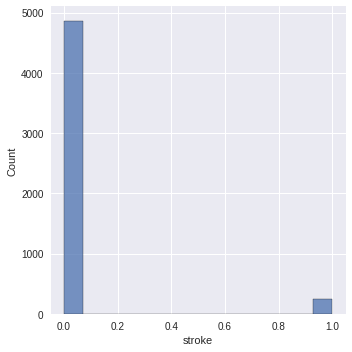

In [7]:
import seaborn as sns

# plot distribution of each column

for col in df.columns[1:]:
    sns.displot(df, x=col)

In [8]:
# compute mean & stddev for each column

for col in df.columns[1:-1]:
        mean = df[col].mean()
        stdev = df[col].std()
        print(f'{col}\tmean: {mean:.2f}\tstdev: {stdev:.2f}')

TypeError: Could not convert MaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleOtherFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemale to numeric

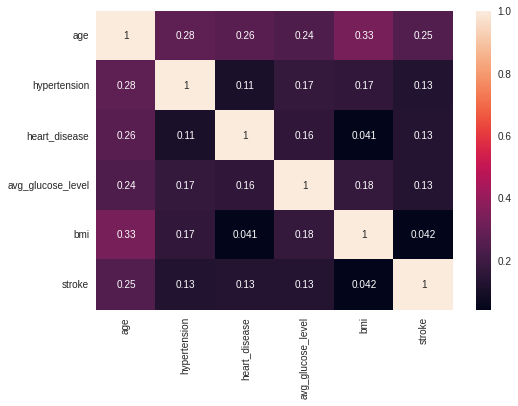

In [10]:
corr_matrix = df[df.columns[1:]].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()